In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Source of the DS:https://archive.ics.uci.edu/dataset/357/occupancy+detection

In [3]:
# Load the test dataset
df_test = pd.read_csv('datatest2.txt')
# Load the  validation dataset
df_val = pd.read_csv('datatest.txt')
# loading the training data
df_train = pd.read_csv('datatraining.txt')

In [ ]:
# so let's check the shape of each DS
print("Train dataset shape:", df_train.shape)
print("Validation dataset shape:", df_val.shape)
print("Test dataset shape:", df_test.shape)

Train dataset shape: (8143, 7)
Validation dataset shape: (2665, 7)
Test dataset shape: (9752, 7)


In [8]:
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [7]:
df_val.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [9]:
df_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
# The time difference range is 59, 60 and 61 seconds, 24 hours, 
# total duration 5 days, 15 hours and 42 min. 2015-02-04 17:51 to 5-02-10 09:3

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [11]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [12]:
# Some values have many decimal places, so I will round them to 2 but humidity rate will be rounded to 5
df_train = df_train.round({'Temperature': 2, 'Humidity': 5, 'Light': 2, 'CO2': 2, 'HumidityRatio': 5})
df_val = df_val.round({'Temperature': 2, 'Humidity': 5, 'Light': 2, 'CO2': 2, 'HumidityRatio': 5})
df_test = df_test.round({'Temperature': 2, 'Humidity': 5, 'Light': 2, 'CO2': 2, 'HumidityRatio': 5})
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.76,31.13333,437.33,1029.67,0.00502,1
2,2015-02-11 14:49:00,21.79,31.00000,437.33,1000.00,0.00501,1
3,2015-02-11 14:50:00,21.77,31.12250,434.00,1003.75,0.00502,1
4,2015-02-11 14:51:00,21.77,31.12250,439.00,1009.50,0.00502,1
5,2015-02-11 14:51:59,21.79,31.13333,437.33,1005.67,0.00503,1


In [13]:
# Converting the date column to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])
df_val['date'] = pd.to_datetime(df_val['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_train = df_train.sort_values('date').reset_index(drop=True)
df_val = df_val.sort_values('date').reset_index(drop=True)
df_test = df_test.sort_values('date').reset_index(drop=True)

In [14]:
# let's check for missing values
print(df_train.isnull().sum())
print(df_val.isnull().sum())
print(df_test.isnull().sum())

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


In [15]:
# let's check for duplicated values
print(df_train.duplicated().sum())
print(df_val.duplicated().sum())
print(df_test.duplicated().sum())

0
0
0


<Axes: xlabel='Occupancy', ylabel='count'>

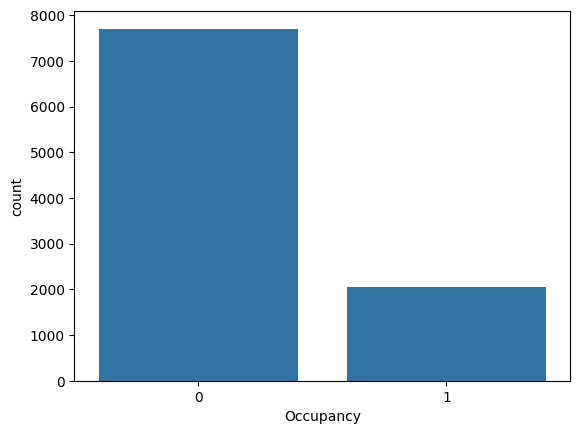

In [16]:
# let's check balance of the target value
sns.countplot(x='Occupancy', data=df_train)

<Axes: xlabel='Occupancy', ylabel='count'>

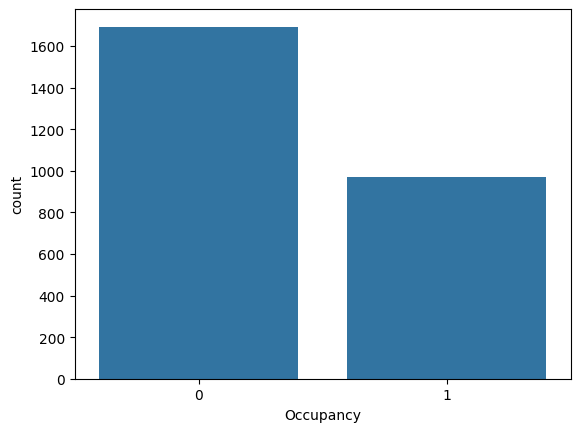

In [17]:
# let's check balance of the target value
sns.countplot(x='Occupancy', data=df_val)

<Axes: xlabel='Occupancy', ylabel='count'>

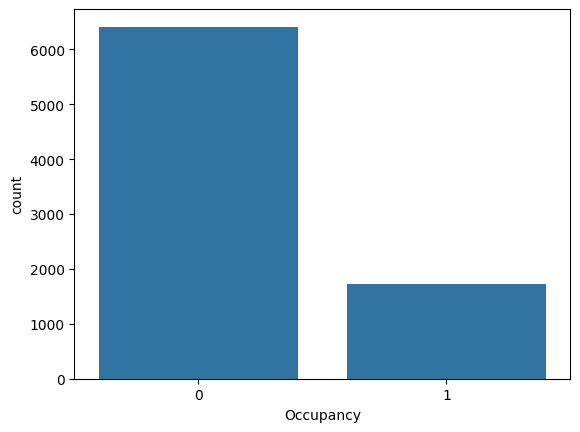

In [18]:
# let's check balance of the target value
sns.countplot(x='Occupancy', data=df_test)

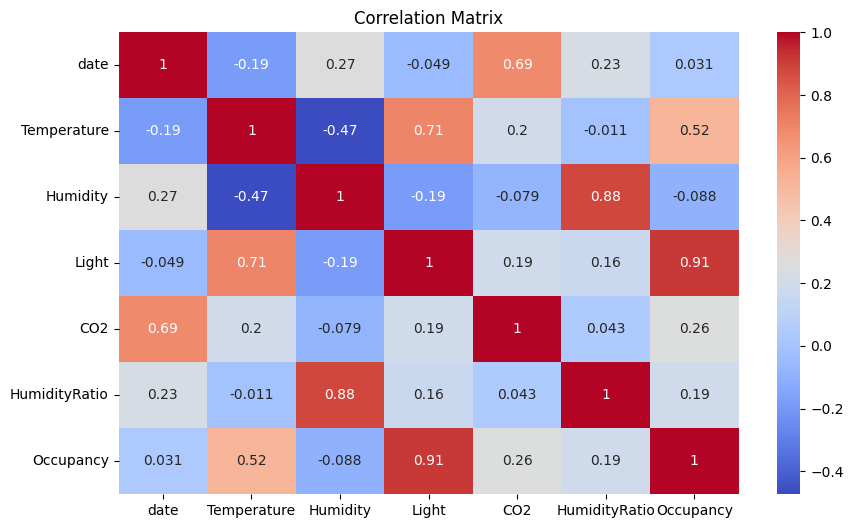

In [19]:
# let's find the correlation between the features
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# I am going to drop Light and HumidityRatio 
# Light has very high correlation with Occupancy and HumidityRatio has very high correlation with Humidity
df_train = df_train.drop(['Light', 'HumidityRatio', 'CO2'], axis=1)
df_val = df_val.drop(['Light', 'HumidityRatio', 'CO2'], axis=1)
df_test = df_test.drop(['Light', 'HumidityRatio', 'CO2'], axis=1)

In [21]:
df_train.shape

(9752, 4)

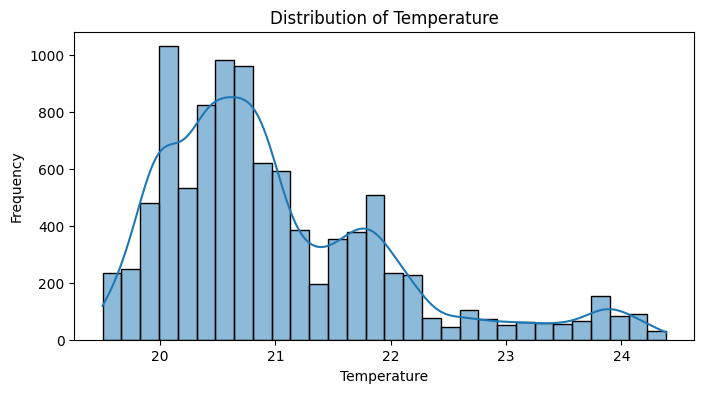

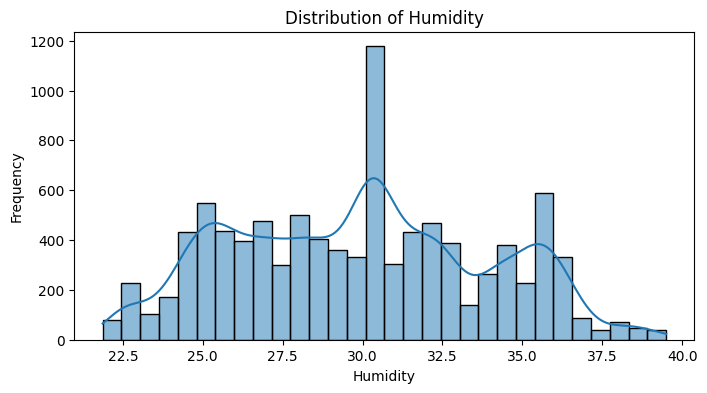

In [22]:
# Let's visualize the distribution of continuous columns
continuous_columns = ['Temperature', 'Humidity']
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [23]:
# Extraxt the minute and hour from the date column
df_train['Hour'] = df_train['date'].dt.hour
df_train['Minute'] = df_train['date'].dt.minute

df_val['Hour'] = df_val['date'].dt.hour
df_val['Minute'] = df_val['date'].dt.minute

df_test['Hour'] = df_test['date'].dt.hour
df_test['Minute'] = df_test['date'].dt.minute

# Now I will drop the date column from the DS 
df_train = df_train.drop('date', axis=1)
df_val = df_val.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)

In [24]:
df_train.shape

(9752, 5)

In [25]:
# Save the cleaned DSs
df_train.to_csv('datatraining.csv', index=False)
df_val.to_csv('datavalidation.csv', index=False)
df_test.to_csv('cleaned_datatest.csv', index=False)